In [1]:
import numpy as np 
import pandas as pd
import textwrap
from utils import *

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('./datasets/public_train.csv', encoding='utf-8')
data

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
0,1,389c669730cb6c54314a46be785cea42,"THĂNG CẤP BẬC HÀM ĐỐI VỚI 2 CÁN BỘ, CHIẾN SỸ H...",1585945439,19477,378,173.0,0
1,2,775baa6d037b6d359b229a656eaeaf08,<URL>,1588939166.0,11,5,3,0
2,3,b9f3394d2aff86d85974f5040c401f08,TƯ VẤN MÙA THI: Cách nộp hồ sơ để trúng tuyển ...,1591405213,48,5,19.0,0
3,4,808e278b22ec6b96f2faf7447d10cd8e,Cơ quan Cạnh tranh và Thị trường Anh quyết địn...,1592023613,3,0,0.0,0
4,5,f81bdd6d8be4c5f64bb664214e47aced,Thêm 7 ca tại Quảng Nam liên quan đến hành khá...,1583737358,775,0,54.0,0
...,...,...,...,...,...,...,...,...
4367,4368,20933f35ef5d22b4d8193cc269c8ff1e,BÀ MẸ VIỆT NAM ANH HÙNG 95 TUỔI MAY KHẨU TRANG...,1584795126.0,5800,1300,12000,0
4368,4369,a117312f796a22e364b8e241b8cb91eb,Nguồn cung khan kiếm nhưng nhu cầu cao tạo áp ...,1590645643,21,1,NaN,0
4369,4370,547ba1b4f95ec07f2cdada24a6eec693,Lời cảnh tỉnh cho các thanh niên dân TỔ...tốc ...,1589774421.0,3,1,NaN,1
4370,4371,acb4a36d6247a0c89dac880725b2b3a0,Đến bây giờ mới biết chỉ cần học lái xe hạng B...,1589551407.0,144,38,87,1


In [3]:
for i in range(len(data)):
    text = data.iat[i,2]
    like = data.iat[i,4]
    comment = data.iat[i,5]
    share = data.iat[i,6]
    label = convert_label_to_text(data.iat[i,7])
    print(f'Example {i}, label: {label}, n_comment: {comment}, n_share: {share}', '\n')
    print(text)
    print('-'*170)

 vì bệnh nhân 34 | Bản tin về virus corona ngày 14.3.2020

Bản tin về virus corona của Báo Thanh Niên trực tiếp lúc 19 giờ trên <URL>, kênh YouTube Báo Thanh Niên, facebook Báo Thanh Niên và trang Báo Thanh Niên trên mạng xã hội Lotus. Ngày 14.3.2020 có các thông tin đáng chú ý: Diễn biến phức tạp về Covid-19 tại Việt Nam và thế giới; Việt Nam ngừng nhập cảnh với người đến từ Anh và khối Schengen; thực hư chuyện bệnh nhân thứ 21 có vợ bé, con riêng….
Bản tin sẽ kết nối với nhà báo Trọng Kha - Trưởng ban quốc tế Báo Thanh Niên - đang có mặt tại Anh để có thêm thông tin về tình hình đại dịch Covid-19 ở châu âu

#Covid19 #corona #viruscorona #virútcorona #nCoV #viêmphổiVũHán     #BảntinCorona
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Example 4256, label: RELIABLE, n_comment: 21, n_share: 12.0 

Bắc Kinh khuyến cáo người dân không rời thành phố, đồng thời đóng cử

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4372 non-null   int64 
 1   user_name         4372 non-null   object
 2   post_message      4371 non-null   object
 3   timestamp_post    4276 non-null   object
 4   num_like_post     4257 non-null   object
 5   num_comment_post  4362 non-null   object
 6   num_share_post    3647 non-null   object
 7   label             4372 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 273.4+ KB


In [5]:
# check post_message: duplicate
dup = data.duplicated(subset=['post_message'])
dup_data = data[dup].sort_values(by='post_message')

# take samples have unique post_message of duplicate
unique_data = dup_data.post_message.unique()

for content in unique_data:
    dup_content = data[['post_message', 'num_like_post', 'num_comment_post', 'num_share_post', 'label']][data.post_message == content]
    print(dup_content)
    print('*'*170)

print('END.')

                                           post_message num_like_post  \
506   "Con virus corona này là một thảm họa tương đư...            48   
3516  "Con virus corona này là một thảm họa tương đư...           214   

     num_comment_post num_share_post  label  
506                 6             74      0  
3516               19            474      1  
**************************************************************************************************************************************************************************
                                           post_message num_like_post  \
1288  "TÔI SỐNG ĐỂ KỂ LẠI!"  Một người sống sót ...          1500   
3425  "TÔI SỐNG ĐỂ KỂ LẠI!"  Một người sống sót ...          3700   

     num_comment_post num_share_post  label  
1288              541           2400      1  
3425             1000           2400      1  
*****************************************************************************************************************

In [6]:
# check post_message: nan values
data[data.post_message.isna() == True]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
2247,2248,66a74969be46766c182b99dc01740a11,NaN,1585331222,9717,28,88.0,0


In [7]:
# check timestamp_post: nan values
data[data.timestamp_post.isna() == True]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
21,22,5eddcdd37c084d4528f89af39c1f4337,Cục Quản lý sản phẩm y tế quốc gia Trung Quốc ...,NaN,4700,549,3300,0
142,143,93ea646ee2b3e4a11eb4e516b41efaba,Dịch Covid-19: Trung Quốc lần đầu thừa nhận có...,NaN,9400,939,3400,1
167,168,0f2bcbfdc6de2f21e68c0026a3a14441,"5 năm trước, Bill Gates đã công khai cảnh báo ...",NaN,3700,277,4700,0
184,185,907f1fdcf852bedc51dfd6e11a81f273,"Gửi đến vị ""tướng tư lệnh"" trong cuộc chiến ch...",NaN,10000,657,4700,0
232,233,28a7bf4c68263f9d9068778ec3b8de93,"""Chúng ta cách ly Vũ Hán, nhưng đừng cách ly t...",NaN,23000,1300,4800,0
...,...,...,...,...,...,...,...,...
4195,4196,b2d8d985c06b203fed093e52008aa64f,PHÁT MIỄN PHÍ HÀNG TRIỆU KHẨU TRANG VẢI ĐỂ NGƯ...,NaN,3000,974,4300,0
4223,4224,1e44dc26ec7db8eb95fe352ff385b2c5,"🇻🇳🇻🇳🇻🇳🇻🇳 'Việt Nam hỡi, Việt Nam ơi! Cùng đoà...",NaN,1100,109,2200,0
4257,4258,50d80468b93b3eaaa6f907f6d5274022,"Moderna Therapetics, một công ty công nghệ sin...",NaN,18000,1300,26000,0
4302,4303,c76936b0e080d87f5ea552844b158da1,"Fang Bin, một cư dân Vũ Hán, đã bí mật gắn máy...",NaN,4400,976,4400,1


In [8]:
# check num_like_post: nan
data[data.num_like_post.isna() == True]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
34,35,c664b20e64207d62260e0091a2b78131,"Công an <URL> cũng cho biết, băng nhóm này mặc...",1591599074.0,NaN,0,NaN,0
65,66,6fe4f053dffbad5149ce29aca2e5f091,Triệu Quân Sự vượt ngục ra sao?\nLợi dụng cán ...,1592614936.0,NaN,0,NaN,0
96,97,c9d730d98bd33bd2a39fcb16e8e906a7,🔖 Người dân bị ảnh hưởng bởi dịch Covid-19 ở H...,1588007032.0,NaN,0,NaN,0
143,144,7a72024ce87b8c33f8fbc4ccebc22066,**Thêm một vụ lấy ý tưởng người khác làm nghiê...,1584342204.0,NaN,0,0,0
148,149,10d7a832500d777fcd11bf3fc764efb4,"Ngày 18/6, lãnh đạo Cục Cảnh sát điều tra tội ...",1592537993.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
4134,4135,8543ecac6d484ef9a79c225b4894b3b6,NHỮNG NỤ CƯỜI NHÂN BẢN\n\nMột sáng kiến tưởng ...,1587459958.0,NaN,0,NaN,0
4189,4190,ad0e433f6dabc4e2cf32544d3bcbc9ee,# **CHƯA KHI NÀO HỆ THỐNG Y TẾ NƯỚC TA LẠI RƠI...,1587357312.0,NaN,0,NaN,0
4194,4195,c658e3bbad6a24afc7cd0444978b5e13,"Dự án hoành tráng, kéo dài qua 2 thập kỉ nhưng...",1586975421.0,NaN,0,NaN,0
4253,4254,27c2320e8fc18a8045a37f758fb5f0b0,Giấy XN âm tính COVID-19 tại Anh có vẻ không x...,1588552076.0,NaN,0,NaN,0


In [9]:
# check num_commnet_post: nan
data[data.num_comment_post.isna() == True]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
520,521,7edc5e39f9557688aa6117324b7df2bd,"CỨU DOANH NGHIỆP ""VƯỢT BÃO"" COVID-19\n\nDịch b...",1584299353,130,NaN,14.0,0
802,803,ca34a6c2dc462d734b3b89ba1c31bc1f,Một Thạc sĩ người Việt Nam đang làm việc tại B...,1581434097.0,607,NaN,2100,1
809,810,bc47a28fc07551c1a22cb256d1a4a892,Một Thạc sĩ người Việt Nam đang làm việc tại B...,1581263045.0,53,NaN,71,1
821,822,512679af778f40361381b65d77ec72cd,"Mưa lớn diện rộng tại Bắc Bộ, Bắc Trung Bộ từ ...",1590095701,96,NaN,11.0,0
1071,1072,f3317e52aa79b261db534a38e7f7c360,HÔM NAY: THÊM 2 BỆNH NHÂN ĐƯỢC CÔNG BỐ KHỎI BỆ...,1585629023,6023,NaN,199.0,0
1688,1689,fbd83d88ba3c6b999f03e75ad695e75e,Những phát ngôn ấn tượng trong tuần.\n\n#phatn...,1584226362,3118,NaN,169.0,0
2112,2113,512679af778f40361381b65d77ec72cd,MỸ Kêu Gọi Người Dân Không Phạm Tội Vì Covid-19,1584559978,73,NaN,12.0,0
2360,2361,c35667034caf782d5714f03394e9e370,Sạch 90% vi khuẩn chỉ trong 15-20s 😎😎😎\nChi ti...,1584071962,NaN,NaN,40.0,0
2649,2650,6f00d1af0bebc972152914703cfdd56d,TIN DỊCH BỆNH DO VIRUS CORONA SÁNG 25/4\n\nNhữ...,1587754760,324,NaN,28.0,0
3149,3150,806b43372f2676bc3beda402d8de60cb,LỄ TRAO GIẢI CUỘC THI ẢNH KHOẢNH KHẮC BÁO CHÍ\...,1591901722,98,NaN,17.0,0


In [10]:
# check num_share_post: nan
data[data.num_share_post.isna() == True]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
5,6,ffc4b6bab27c40cfc48e4dc8b8a41e42,Trong giờ học Thể dụ‌c do thầy giáo Nguyễn Văn...,1590466764.0,2,1,NaN,0
8,9,981e2b970947bd3edaf20a63579c06c8,Hà Tĩnh nằm trong nhóm 'nguy cơ cao' gồm 12 tỉ...,1586951248.0,6,0,NaN,0
9,10,bea6f4036aa4d8455d7b73a3e4f24ee5,"Nhiều người cho rằng, việc thực hiện tổng kiểm...",1589960663.0,6,0,NaN,0
17,18,dab99fab8f25313f4356c88a5ccf5408,Bé gái 15 tuổi trong vụ án hi.ếp d.âm bị 2 đối...,1587723824.0,1,0,NaN,0
18,19,fb5b509414989941752b24ba4cb25f6e,Rất nhiều tỷ bị thất thoát theo những khe nứt ...,1591583338.0,1,0,NaN,0
...,...,...,...,...,...,...,...,...
4345,4346,6bb91cedae71782f7520f5a459e96d07,Hé lộ 27 phi công Pakistan đang lái cho hãng h...,1593400001.0,7,0,NaN,0
4364,4365,80a4b6469676e797e34142a0a33b4b45,"Phải công nhận là Công an giỏi thật, nếu quyết...",1588423228.0,22,3,NaN,0
4368,4369,a117312f796a22e364b8e241b8cb91eb,Nguồn cung khan kiếm nhưng nhu cầu cao tạo áp ...,1590645643,21,1,NaN,0
4369,4370,547ba1b4f95ec07f2cdada24a6eec693,Lời cảnh tỉnh cho các thanh niên dân TỔ...tốc ...,1589774421.0,3,1,NaN,1


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

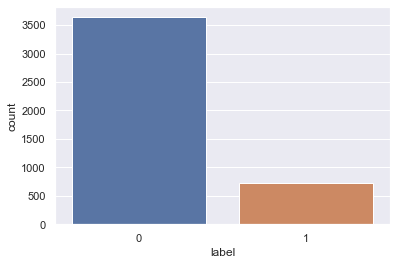

Percent of 0 label: 83.21%
Percent of 1 label: 16.79%


In [12]:
sns.set_theme(style='darkgrid')
sns.countplot(x='label', data=data)
plt.show()

num_label_0 = (data.label == 0).sum()
num_label_1 = (data.label == 1).sum()
num_label = len(data)
print(f'Percent of 0 label: {round(num_label_0/num_label * 100,2)}%')
print(f'Percent of 1 label: {round(num_label_1/num_label * 100,2)}%')

In [13]:
from utils import *

In [14]:
# check Dtype of num_like_post
content = []
for cont in data.num_like_post.unique():
    try:
        int(float(cont))
    except:
        content.append(cont)
print(content)

[nan, 'unknown', ' Solskjaer hạ knock-out Guardiola', ' Ngang nhiên chiếm dụng đất dự án hồ Yên Sở làm bãi xe tải...là những tin tức kinh tế nóng nhất 24h qua.', '54 like', ' Kết quả phiên xử đầu tiên cảnh sát Mỹ ghì chết George Floyd... là những tin tức quốc tế đáng chú ý ngày 9.6.', ' Thế giới đẩy nhanh tốc độ phát triển vaccine ngừa COVID-19 là những tin tức mới nhất trong bản tin Mới nhất dịch COVID-19 của Báo Lao Động ngày 17.3.']


In [15]:
# what is happend on num_like_post?
result = []
for i in range(len(content)):
    temp = data[data.num_like_post == content[i]].reset_index()
    result.append(temp)
print(len(result))

7


In [16]:
print(result[0])

Empty DataFrame
Columns: [index, id, user_name, post_message, timestamp_post, num_like_post, num_comment_post, num_share_post, label]
Index: []


In [17]:
pd.set_option('display.max_rows', None)
result[1]

,index,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
0,35,36,fe8176d5bc081419f9b08e195525c131,Người mặt đen miệng ngậm 2 quả gì đó tay cầm đ...,1575711720.0,unknown,unknown,unknown,1
1,77,78,45d80e8d62eac8e3f28a8c822fab002d,Mọi người ra đường nhớ đeo khẩu trang nha. Đã ...,1596949200.0,unknown,unknown,unknown,1
2,177,178,0adfdeb881147078b0c50354193d67dd,Ca Phẫu Thuật thất bại. Hoài Linh lâm vào tình...,1501295400.0,unknown,unknown,unknown,1
3,285,286,6d46f2b04842bb2221e493968cd05ca4,Ngày hôm qua gia đình mình có ra chợ Thới Bình...,1499075340.0,unknown,unknown,unknown,1
4,637,638,17fdafcfe5348b4c35f01f62c403e68c,Danh Hài Thúy Nga Qua Đời Để Lại Gia Tài Triệu...,1593485100.0,unknown,unknown,unknown,1
5,702,703,e99c6c2cc55c5ea0440f083cf49b3d15,Nóng: Gia Lâm điện giật 20 người chết tại công...,1559969640.0,unknown,unknown,unknown,1
6,782,783,7c14dfd9cc4c03990ed7343651a06c85,Đàm Vĩnh Hưng Qua Đời Đột Ngột Mr Đàm Ông Hoàn...,1388673720.0,unknown,unknown,unknown,1
7,906,907,b88254b2119a7ab65818a6f8401b82fa,CÔ GÁI MANG MẦM BỆNH VỀ LÂY LAN TỪ Ý!\n\nCó ph...,1583518680.0,unknown,unknown,unknown,1
8,1151,1152,4e715ea047ac025ed59d5827ff24ac65,BÁO ĐỘNG 1 Ổ DỊCH COVID-19 TẠI SÀI GÒN ! - HƠN...,1581430440.0,unknown,unknown,unknown,1
9,1307,1308,24e37b98630b5ba7668716f65787f16c,"Tôi thành thật xin lỗi mọi người, hiện tôi đã ...",1581897000.0,unknown,unknown,unknown,1


In [18]:
num_data = pd.read_csv('num_data_del.csv', encoding='utf-8')

num_data.head(10)

,id,num_like_post,num_comment_post,num_share_post,label
0,1,19477,378,173,0
1,3,48,5,19,0
2,4,3,0,0,0
3,5,775,0,54,0
4,6,2,1,0,0
5,7,25,1,1,0
6,8,6,0,1,0
7,9,6,0,0,0
8,10,6,0,0,0
9,11,170,51,68,1


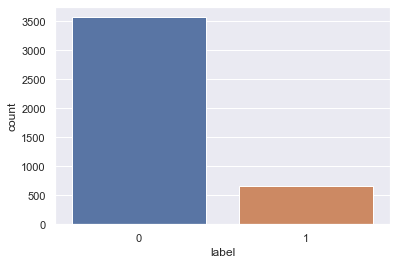

Percent of 0 label: 84.47%
Percent of 1 label: 15.53%


In [19]:
count_plot(num_data)

In [20]:
cols = ['num_like_post', 'num_comment_post', 'num_share_post', 'label']
subnets = num_data[cols]
subnets.corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,num_like_post,num_comment_post,num_share_post,label
num_like_post,1.00,0.01,-0.01,-0.01
num_comment_post,0.01,1.00,0.69,0.02
num_share_post,-0.01,0.69,1.00,0.07
label,-0.01,0.02,0.07,1.00


In [21]:
num_data_down = pd.read_csv('num_data_del_down.csv')

print(num_data_down.shape)
num_data_down.head(10)

(1456, 5)


,id,num_like_post,num_comment_post,num_share_post,label
0,4341,400,15,79,0
1,1035,40000,1400,2600,0
2,2896,13,1,0,0
3,3941,6,0,0,0
4,1805,6,1,0,0
5,2340,33,0,2,0
6,4177,29,5,1,0
7,2073,3500,16,2900,0
8,1106,369,50,7,0
9,3155,135,1,12,0


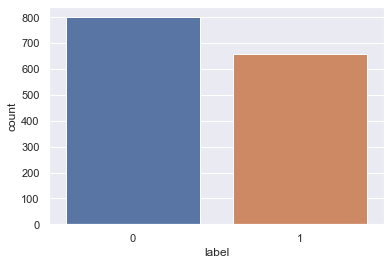

Percent of 0 label: 54.95%
Percent of 1 label: 45.05%


In [22]:
count_plot(num_data_down)

In [23]:
text_data = pd.read_csv('cat_data_del.csv', encoding='utf-8')

print(text_data.shape)
text_data.head(10)

(4224, 3)


,id,post_message,label
0,1,"THĂNG CẤP BẬC HÀM ĐỐI VỚI 2 CÁN BỘ, CHIẾN SỸ H...",0
1,3,TƯ VẤN MÙA THI: Cách nộp hồ sơ để trúng tuyển ...,0
2,4,Cơ quan Cạnh tranh và Thị trường Anh quyết địn...,0
3,5,Thêm 7 ca tại Quảng Nam liên quan đến hành khá...,0
4,6,Trong giờ học Thể dụ‌c do thầy giáo Nguyễn Văn...,0
5,7,Chủ đầu tư tại Hà Nội tung sản phẩm có mức giá...,0
6,8,Luật sư Trần Hồng Phong cung cấp tình tiết mới...,0
7,9,Hà Tĩnh nằm trong nhóm 'nguy cơ cao' gồm 12 tỉ...,0
8,10,"Nhiều người cho rằng, việc thực hiện tổng kiểm...",0
9,11,"Trong 1 vụ xô xát nhỏ thôi, em trai này bị bắt...",1


In [24]:
for i in range(len(text_data)):
    index = text_data.iat[i,0]
    text = text_data.iat[i,1]
    label = convert_label_to_text(data.iat[i,2])
    print(f'Example {i}, label: {label}, index: {index}', '\n')
    print(text)
    print('*'*100)

Hàn Quốc đưa 720 người dân Hàn Quốc từ Vũ Hán trở về, trong khi chính quyền “dân chủ” Nhật Bản, Mỹ bận bịu thu tiền người bệnh muốn trở về nước thì chính phủ Việt Nam chỉ tuyên bố một câu đơn giản “sẵn sàng đón bà con về nước”. Chúng ta, cũng sẵn sàng chào đón bà con, đồng bào về nước, không gì hơn khi những lúc khó khăn, vòng <URL> của người Việt lại khiến cho những người con xa xứ cảm thấy được bảo vệ và chở che. Hôm qua, Bộ Tư lệnh Thủ đô cho biết đã chuẩn bị đầy đủ cơ sở vật chất để đón 950 người từ vùng dịch trở về trong 14 ngày tại các địa điểm quân đội tại Sơn Tây và Xuân Mai. Không có người biểu tình, cũng chẳng có máy kéo, chẳng có biểu ngữ... nào ngăn những người Việt hồi hương về cội nguồn lúc khó khăn cả. Trong khi đó, bảo hiểm y tế cũng tuyên bố sẽ chi trả toàn bộ tiền điều trị cho các bệnh nhân nghi nhiễm virus nCov, không ai bị bỏ rơi trong cuộc chiến dịch bệnh corona cả. Hàng ngày, hàng chục triệu thuê bao đều liên tục nhận được các tin nhắn của Bộ Y tế khuyến cáo về vi

In [25]:
for i in range(len(text_data)):
    index = text_data.iat[i,0]
    text = text_data.iat[i,1]
    label = convert_label_to_text(data.iat[i,2])
    print(f'Example {i}, label: {label}, index: {index}', '\n')
    print(text)
    print('*'*100)

Hàn Quốc đưa 720 người dân Hàn Quốc từ Vũ Hán trở về, trong khi chính quyền “dân chủ” Nhật Bản, Mỹ bận bịu thu tiền người bệnh muốn trở về nước thì chính phủ Việt Nam chỉ tuyên bố một câu đơn giản “sẵn sàng đón bà con về nước”. Chúng ta, cũng sẵn sàng chào đón bà con, đồng bào về nước, không gì hơn khi những lúc khó khăn, vòng <URL> của người Việt lại khiến cho những người con xa xứ cảm thấy được bảo vệ và chở che. Hôm qua, Bộ Tư lệnh Thủ đô cho biết đã chuẩn bị đầy đủ cơ sở vật chất để đón 950 người từ vùng dịch trở về trong 14 ngày tại các địa điểm quân đội tại Sơn Tây và Xuân Mai. Không có người biểu tình, cũng chẳng có máy kéo, chẳng có biểu ngữ... nào ngăn những người Việt hồi hương về cội nguồn lúc khó khăn cả. Trong khi đó, bảo hiểm y tế cũng tuyên bố sẽ chi trả toàn bộ tiền điều trị cho các bệnh nhân nghi nhiễm virus nCov, không ai bị bỏ rơi trong cuộc chiến dịch bệnh corona cả. Hàng ngày, hàng chục triệu thuê bao đều liên tục nhận được các tin nhắn của Bộ Y tế khuyến cáo về vi

In [26]:
cat_data = pd.read_csv('cat_data_del_down_pre.csv', encoding='utf8')

print(cat_data.shape)
cat_data.head(20)

(1456, 4)


,id,post_message,label,post_message_preproced
0,448,"Hoá đơn tiền điện tăng ""sốc"": Kẽ hở trong việc...",0,hoá_đơn tiền điện sốc kẽ hở ghi điện việt_nam ...
1,7,Chủ đầu tư tại Hà Nội tung sản phẩm có mức giá...,0,chủ đầu_tư hà_nội tung sản_phẩm giá tỷ đồng đó...
2,1278,Công an huyện Kbang ra quyết định tạm giữ hình...,0,công_an huyện kbang quyết_định tạm hình_sự phạ...
3,2745,Quá thương tâm\nPhó Chủ tịch UBND quận Bình Tâ...,0,thương_tâm phó chủ_tịch ubnd bình_tân tphcm nạ...
4,2009,Công ty TNHH Thương mại Thủy sản Vĩnh Long đã ...,0,công_ty tnh thương_mại thuỷ_sản vĩnh_long lợi_...
5,2454,ĐẾN 6H SÁNG NAY: CHƯA GHI NHẬN CA MẮC MỚI\n\nN...,0,ghi_nhận ca mắc trôi việt_nam ghi_nhận ca mắc ...
6,1277,"Bố ơi yên nghỉ, con không về được!\n\nNgười lí...",0,bố yên_nghỉ lính quân_hàm xanh đánh dịch covid...
7,2452,Xuân Lộc thất thủ. Các tuyến phòng ngự từ xa đ...,0,xuân_lộc thất_thủ tuyến phòng_ngự phá vỡ địch ...
8,1460,"Bất ngờ thú vị, một năm có 3 ngày Valentine",0,thú_vị valentine
9,3452,Cùng với quá trình điều tra của Công an tỉnh B...,0,điều_tra công_an tỉnh bình_dương vụ án hành_vi...


In [28]:
for i in range(150):
    text = cat_data.post_message_preproced[i]
    print(text)
    print('*'*100)

hoá_đơn tiền điện sốc kẽ hở ghi điện việt_nam hoàn_thành xuất_khẩu lô vải_thiều nhật_bản an_toàn chân nông_dân tận cánh đồng hễ xuống_giống chết tin_tức kinh_tế
****************************************************************************************************
chủ đầu_tư hà_nội tung sản_phẩm giá tỷ đồng đón bắt mua gia_đình trẻ nhu_cầu thực skyoasis
****************************************************************************************************
công_an huyện kbang quyết_định tạm hình_sự phạm ngọc sinh hành_vi hiếp_dâm
****************************************************************************************************
thương_tâm phó chủ_tịch ubnd bình_tân tphcm nạn_nhân vụ nghi phóng_hoả chết phường bình trị đông cháu vụ nghi phóng_hoả chết phòng trọ đường phường bình trị đông trao_đổi phóng_viên nguyễn gia thái_bình phó chủ_tịch ubnd bình_tân chỉ_đạo cơ_quan_chức_năng điều_tra nguyên_nhân vụ cháy trước_mắt chính_quyền triệu đồng gia_đình nạn_nhân quê an_táng thông_tin nắm nạn_nhân

In [30]:
num_test = pd.read_csv('num_test.csv')
num_test.head(10)

,id,num_like_post,num_comment_post,num_share_post,label
0,2958,38,16,5,1
1,518,2,0,0,1
2,1174,1500,246,573,1
3,1634,3312,983,638,1
4,678,27,18,4,1
5,3625,14,5,15,1
6,4301,30,4,2,1
7,686,12,2,1,1
8,4237,23,0,0,1
9,1497,325,56,417,1


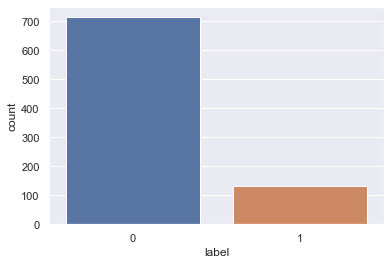

Percent of 1 label: 15.5%
Percent of 0 label: 84.5%


In [31]:
count_plot(num_test)

In [32]:
cat_test = pd.read_csv('cat_test.csv', encoding='utf8')
cat_test.head(10)

,id,post_message,label
0,2958,Bác này thấy áy náy.\n\n[<URL>](<URL>),1
1,518,Sự xuất hiện của 2 người đàn bà dấu mặt : Phạm...,1
2,1174,VIỆT NAM NGẠO NGHỄ HAY NGẠO MẠN? Đây là một tr...,1
3,1634,Ca bệnh 17 bị phạt tù 15 năm\n\nNữ bệnh nhân s...,1
4,678,Lỗi này do cụ Nguyễn Quốc Triệu chọn phải ngườ...,1
5,3625,"Theo ông Dũng, chỉ cần nhỏ 1 giọt tinh dầu trà...",1
6,4301,"Xem vụ này sẽ thấy, Thuế của dân sẽ có nguy cơ...",1
7,686,"Câu hỏi đặt ra, FLC hiện đang vỡ nợ, cả hãng h...",1
8,4237,Anh Mark chủ Facebook & goole bị anh công dân ...,1
9,1497,Bác ở Canada vừa mới báo 1 tin vui từ Canada t...,1


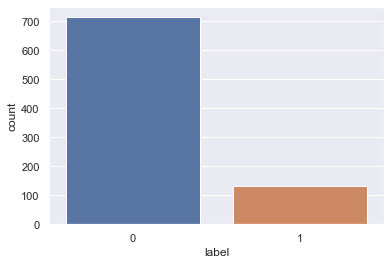

Percent of 1 label: 15.5%
Percent of 0 label: 84.5%


In [33]:
count_plot(cat_test)